## layer_extraction

In [7]:
import os
import json
from PIL import Image
import torch
from torch import optim
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torch.autograd import Variable
from alexnet_pytorch import AlexNet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
models.alexnet(pretrained=True)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [9]:
### NOTE!!!!!! You need to set the ou-put size which is equivilant to the size of the layer in your model. 
## Here I have it set to 4096 in my loop below, because that's what's in layer 6 of my model. 

def get_vector(image_name, output_size):
    # 1. Load the image with Pillow library
    img = Image.open(image_name)
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(output_size)
    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data.squeeze())
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    model(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return my_embedding

In [15]:
model = models.alexnet(pretrained=True)

# Use the model object to select the desired layer
layer = model.classifier[5]

# Set model to evaluation mode
model.eval()
scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

df = pd.DataFrame()
foldername = "neu_white" # you need to set this to your foldername here.... and how you do the loop will be specific to your file structure

for filename in os.listdir(('ratings/' + foldername)):
    if filename.endswith(".png"):
        print(filename)
        input_image = str('ratings/' + foldername +'/' + filename)
        pic_vector = get_vector(input_image, 4096)
        # below I label the column of my dataframe based on the string format I need, but you can save it to a DF however you need
        df[str(filename[8:-4])]=pd.Series(pic_vector)

neu_01a_truck.png
neu_01b_gondola.png
neu_02a_bee.png
neu_03a_hoover.png
neu_03b_mower.png
neu_04a_outlet.png
neu_04b_keyhole.png
neu_05a_bat.png
neu_05b_airplane.png
neu_06a_keg.png
neu_06b_sack.png
neu_07a_glasses.png
neu_07b_camera.png
neu_08b_gum.png
neu_09a_laundry.png
neu_09b_dishes.png
neu_10a_bbat.png
neu_10b_beach.png


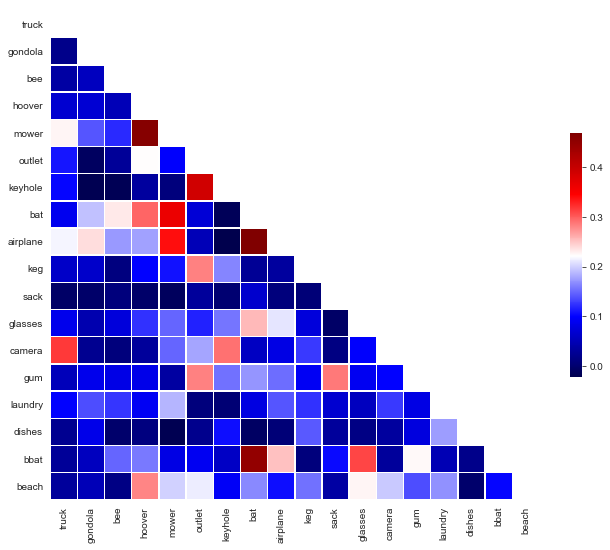

In [16]:
sns.set_style(style="white")

# Compute the correlation matrix
corr = df.corr()
#corr = 1 - corr

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap='seismic',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})